In [5]:
import pandas as pd
import sys

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

# Set correct working directory
import os
if os.getcwd() != os.path.abspath("../Python"):
    os.chdir("../../../Python")

import confusion_matrix2 as confusion_matrix

In [4]:
#Load data and change classes to 0 and 1
trn_data2 = pd.read_csv(sys.path[0] + "/../../../TrainingData/neodata/14d_setpoints_1200.csv")
tst_data = pd.read_csv(sys.path[0] + "/../../../TestData/neodata/14d_setpoints_100.csv")

#Substracting one setpoint from training data for validation
vld_data = trn_data2.loc[trn_data2['setpoint']==1]
trn_data1 =trn_data2.loc[trn_data2['setpoint']!=1]

# Setting all fault targets to 1
trn_data1.loc[trn_data1['target']!=0,'target'] = 1
tst_data.loc[tst_data['target']!=0,'target'] = 1
vld_data.loc[vld_data['target']!=0,'target'] = 1

# Set the amount of faulty and non-faulty data equal
trn_data_fault = trn_data1.loc[trn_data1['target']!=0]
trn_data_fault2 = trn_data_fault.sample(1200)                   #Taking 1200 sampels of the faulty data
trn_data_fault2['target'] = 1                                     #Setting target to 1

trn_data_NoFault = trn_data1.loc[trn_data1['target']==0]      #Taking 1200 sampels of non-faulty
trn_data_NoFault2 = trn_data_NoFault.copy()

trn_data = pd.concat([trn_data_fault2,trn_data_NoFault2])

In [6]:
#Nameing and standardization
X_trn1 = trn_data.drop(['target','setpoint'],axis =1).to_numpy()
X_vld1 = vld_data.drop(['target','setpoint'],axis=1).to_numpy()
X_tst1 = tst_data.drop(['target','setpoint'],axis=1).to_numpy()

y_trn=trn_data['target'].to_numpy()
y_val=vld_data['target'].to_numpy()
y_tst=tst_data['target'].to_numpy()

g_trn = trn_data['setpoint'].to_numpy()             #Setpoint groups, not used
g_tst = tst_data['setpoint'].to_numpy()

scale = StandardScaler()
X_trn = scale.fit_transform(X_trn1)
X_vld = scale.transform(X_vld1)
X_tst = scale.transform(X_tst1)

(<Figure size 200x200 with 1 Axes>,
 <AxesSubplot:title={'center':'Test data : Accuracy 51.238%'}, xlabel='Predicted class', ylabel='True class'>)

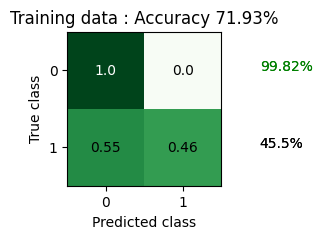

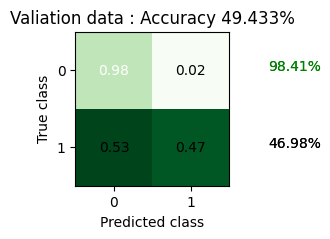

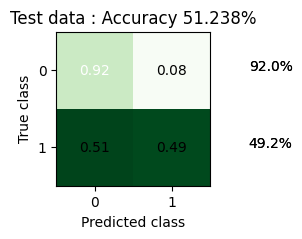

In [73]:
#PCA reduction
reducer = PCA(n_components=6)
reducer.fit(X_trn)
X_trn_pca = reducer.transform(X_trn)
X_vld_pca = reducer.transform(X_vld)
X_tst_pca = reducer.transform(X_tst)
#Classification
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_trn_pca,y_trn)

y_trn_predict = clf.predict(X_trn_pca)
confusion_matrix.confusion_matrix(y_trn,y_trn_predict,title='Training data',figsize=(2,2))

y_vld_predict = clf.predict(X_vld_pca)
confusion_matrix.confusion_matrix(y_val,y_vld_predict,title='Valiation data',figsize=(2,2))

y_tst_predict = clf.predict(X_tst_pca)
confusion_matrix.confusion_matrix(y_tst,y_tst_predict,title='Test data',figsize=(2,2))